In [1]:
import pandas as pd
import numpy as np
from dataclass import Rx

df = pd.read_excel("./data - 副本.xlsx")

In [2]:
mask = (df["原始诊断"]!="无诊断") & (df["统计项"]=="标准片数") & (df["来源"] == "门诊")# & (df["通用名"].isin(["阿利沙坦酯"]))
df2 = df.loc[mask,:]
r = Rx(df2, name="门诊标准片数")

c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\dataclass.py:107: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


In [4]:
r.get_union(groupby="关注科室", len_set=2, labels_in=["高血压"])

c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\dataclass.py:107: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


,心内科,老干科,普内科,肾内科,神内科,内分泌科,其他
高血压合并症,,,,,,,
高血压+冠心病,0.277175,0.230293,0.229873,0.060787,0.283611,0.191865,0.155013
高血压+血脂异常,0.185831,0.151484,0.130855,0.104350,0.283498,0.267522,0.119049
高血压+糖尿病,0.033395,0.127832,0.108394,0.054294,0.056766,0.492724,0.094183
高血压+卒中,0.020106,0.091701,0.052463,0.006856,0.392075,0.027000,0.028495
高血压+高尿酸,0.019428,0.020961,0.024670,0.089581,0.005457,0.040095,0.046581
高血压+心力衰竭,0.007642,0.007129,0.010449,0.003387,0.001231,0.000627,0.003005
高血压+慢性肾病,0.003482,0.010351,0.021862,0.252397,0.001692,0.030929,0.114264


In [18]:
r.get_undup_cbns_groupby("关注科室").to_clipboard()

In [19]:
r.get_undup_cbns_groupby("通用名").to_clipboard()

In [32]:
r.get_undup_cbns_groupby("商品名").to_clipboard()

In [20]:
r.get_dup_cbns().to_clipboard()

In [21]:
r.get_dup_cbns_groupby("关注科室").to_clipboard()

In [23]:
r.get_dup_cbns_groupby("通用名").to_clipboard()

In [33]:
r.get_dup_cbns_groupby("商品名").to_clipboard()

In [24]:
r.get_cbns_len().to_clipboard()

In [25]:
r.get_cbns_len_groupby("关注科室").to_clipboard()

In [26]:
r.get_cbns_len_groupby("通用名").to_clipboard()

In [34]:
r.get_cbns_len_groupby("商品名").to_clipboard()

(0.7873439007240222, 0.0013108607109764267, 0.0034821186190476423) [0.7908260193430698, 0.004792979330024069]
('高血压', '慢性肾病')


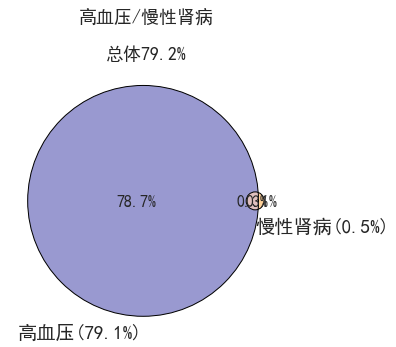

In [20]:
from itertools import combinations

r.plot_venn(('高血压', "慢性肾病"))
# labels = df.columns[-8:]
# set2 = combinations(labels, 2)

# for set in set2:
#     plot_venn(set)

In [ ]:
r.plot_barh("通用名")

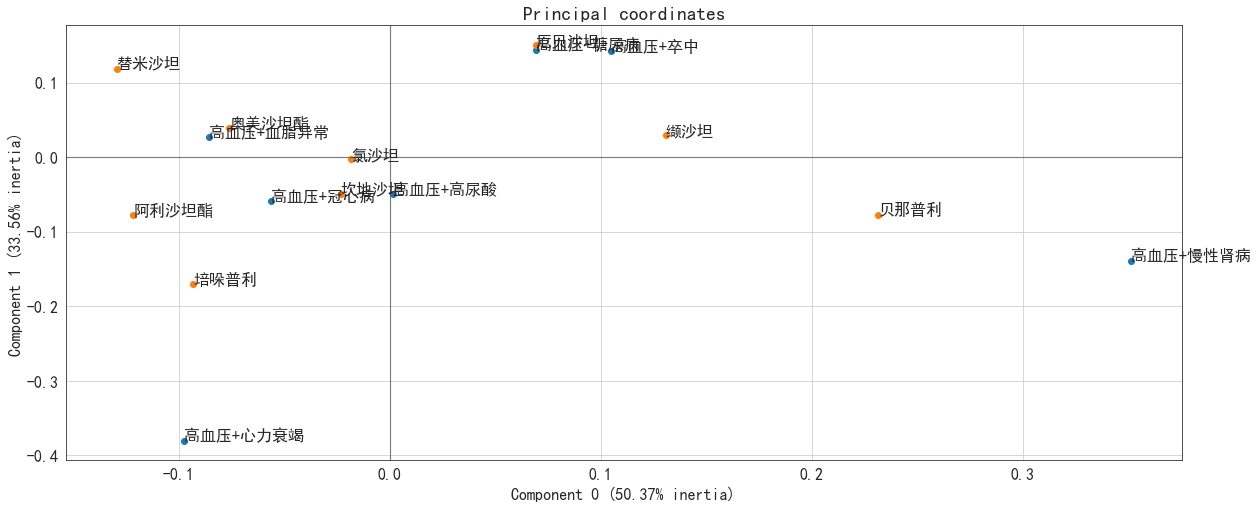

In [3]:
r.plot_ca("通用名")